### Importing Libraries and Data

Import pandas and numpy for data analysis and matplotlib/seaborn for visualization. Import logistic regression libraries and its metrics from sklearn for predictive modeling.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv("email.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Analysis and Cleaning

Examine the emails to see which are missing values and which are duplicates, then drop all occurrences of each. There are no missing values, but there are 415 duplicates.

In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.duplicated().sum()

415

In [12]:
df.drop_duplicates(inplace=True)

### Training/Testing Splits

In [18]:
x = df['Message']
y = df['Category']
x_train, x_test, y_train, y_test = train_test_split(df["Message"], df["Category"], test_size = 0.2, random_state=42)

In [20]:
cv=CountVectorizer()
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)
print(x_test_vectorized)

  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


### Logistic Regression

In [21]:
lg = LogisticRegression()
lg.fit(x_train_vectorized, y_train)

LogisticRegression()

In [26]:
y_prediction = lg.predict(x_test_vectorized)

#Model scores
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction, pos_label='spam')
recall = recall_score(y_test, y_prediction, pos_label = 'spam')
f1 = f1_score(y_test, y_prediction, pos_label='spam')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Accuracy: 0.9787
Precision: 0.9754
Recall: 0.8623
F1 score: 0.9154


### Confusion Matrix

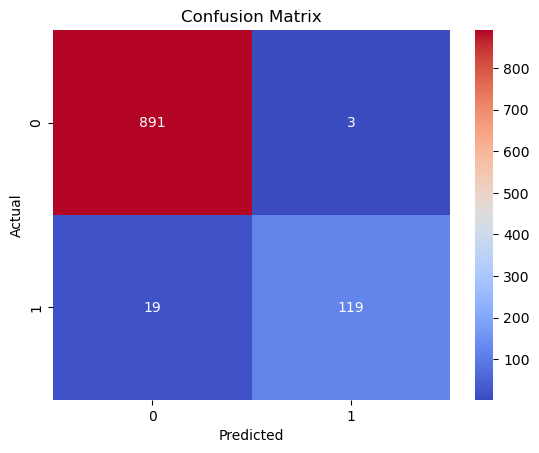

In [27]:
conf_matrix = confusion_matrix(y_test, y_prediction)

sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()